In [2]:
import numpy as np
from glob import glob

#load features
def load_and_concatenate_batches(base_filename='features_batch'):
    features_files = sorted(glob(f'{base_filename}_features_*.npy'))
    labels_files = sorted(glob(f'{base_filename}_labels_*.npy'))
    features_batches = [np.load(f) for f in features_files]
    labels_batches = [np.load(f) for f in labels_files]
    features = np.vstack(features_batches)
    labels = np.hstack(labels_batches)
    return features, labels

# loading the batches of features and labels
features, labels = load_and_concatenate_batches()

print("Loaded features shape:", features.shape)
print("Loaded labels shape:", labels.shape)


Loaded features shape: (2459, 16896)
Loaded labels shape: (2459,)


In [3]:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
features_normalized = scaler.fit_transform(features)


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features_normalized, labels, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (1967, 16896)
X_test shape: (492, 16896)
y_train shape: (1967,)
y_test shape: (492,)


In [5]:

num_classes = len(set(labels))  
print("Number of classes:", num_classes)


Number of classes: 26


In [6]:
import os
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.preprocessing import LabelEncoder
dataset_folder = r'C:\Users\tw93\OneDrive\Desktop\masters_project\dataset'

img_height = 128
img_width = 128
channels = 1  

# load and preprocess images and labels
def load_and_preprocess_data(dataset_folder):
    features = []
    labels = []
    for class_folder in os.listdir(dataset_folder):
        class_path = os.path.join(dataset_folder, class_folder)
        if os.path.isdir(class_path):
            for img_name in os.listdir(class_path):
                img_path = os.path.join(class_path, img_name)
                img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                img = cv2.resize(img, (img_width, img_height))
                features.append(img)
                labels.append(class_folder)
    
    features = np.array(features)
    labels = np.array(labels)

   
    features = features.astype('float32') / 255.0

    # Encode labels
    label_encoder = LabelEncoder()
    labels = label_encoder.fit_transform(labels)

 
    features = features.reshape(features.shape[0], img_height, img_width, channels)
    
    return features, labels

# Load and preprocessing the data
features, labels = load_and_preprocess_data(dataset_folder)

# Spliting the dataset
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)


num_classes = 26  

# creating CNN model
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(img_height, img_width, channels)),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')  
])

# Compilation of model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Training  the model
history = model.fit(X_train, y_train,
                    epochs=100,
                    batch_size=32,
                    validation_data=(X_test, y_test))

# Evaluating the model 
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc}")

import json
model.save('trained_model.keras')
with open('training_history.json', 'w') as f:
    json.dump(history.history, f)

c:\Users\tw93\OneDrive\Desktop\masters_project\env\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 25s 362ms/step - accuracy: 0.0471 - loss: 5.3185 - val_accuracy: 0.0325 - val_loss: 3.2586
Epoch 2/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 21s 342ms/step - accuracy: 0.0479 - loss: 3.2612 - val_accuracy: 0.0407 - val_loss: 3.2594
Epoch 3/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 20s 328ms/step - accuracy: 0.0445 - loss: 3.2550 - val_accuracy: 0.0366 - val_loss: 3.2602
Epoch 4/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 20s 327ms/step - accuracy: 0.0390 - loss: 3.2551 - val_accuracy: 0.0366 - val_loss: 3.2611
Epoch 5/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 20s 327ms/step - accuracy: 0.0455 - loss: 3.2526 - val_accuracy: 0.0407 - val_loss: 3.2620
Epoch 6/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 23s 364ms/step - accuracy: 0.0467 - loss: 3.2515 - val_accuracy: 0.0366 - val_loss: 3.2627
Epoch 7/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 20s 321ms/step - accuracy: 0.0517 - loss: 3.2515 - val_accuracy: 0.0366 - val_loss: 3.2637
Epoch 8/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 20s 321ms/step - accuracy: 0.0509 - loss: 3.2488 - 

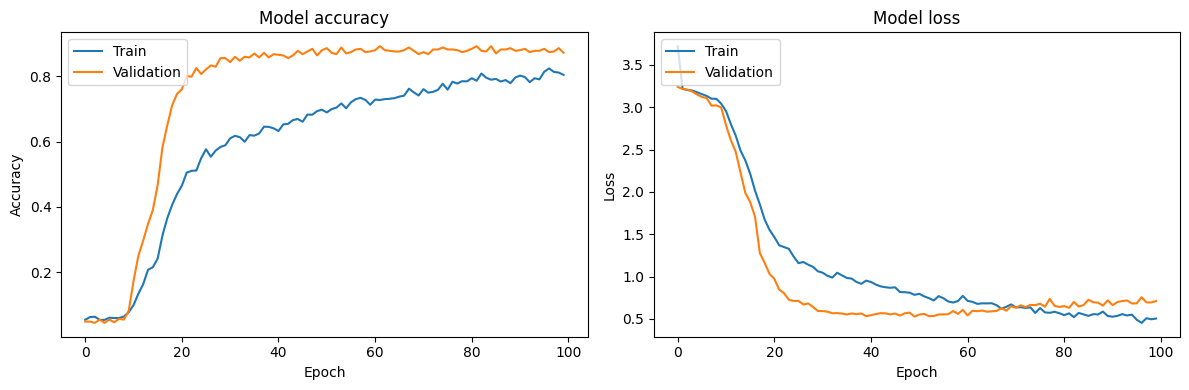

In [6]:
import json
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
model = load_model(r'C:\Users\tw93\OneDrive\Desktop\food image detection and calories estimation\trained_model.keras')

# Loading the train history
with open('training_history.json', 'r') as f:
    history = json.load(f)
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()
